# **Baixando dados dos balanços das empresas listadas na Bolsa**

Base de Dados CVM

http://www.cvm.gov.br


## *Configurações Iniciais*

In [ ]:
!pip install wget

In [1]:
import pandas as pd
import wget
from zipfile import ZipFile


In [ ]:
url_base = 'http://dados.cvm.gov.br/dados/CIA_ABERTA/DOC/ITR/DADOS/'

* Criando uma lista com o nome de todos os arquivos

In [ ]:
arquivos_zip = []
for ano in range(2011,2021):
  arquivos_zip.append(f'itr_cia_aberta_{ano}.zip')

arquivos_zip


Fazendo o download dos arquivos. 

In [ ]:
for arq in arquivos_zip:
  wget.download(url_base+arq)
  

* extraindo os arquivos zip

In [ ]:
for arq in arquivos_zip:
  ZipFile(arq, 'r').extractall('CVM')

* Criando arquivos históricos

In [ ]:
nomes = ['BPA_con', 'BPA_ind', 'BPP_con', 'BPP_ind', 'DFC_MD_con', 'DFC_MD_ind', 'DFC_MI_con', 'DFC_MI_ind', 'DMPL_con', 'DMPL_ind', 'DRE_con', 'DRE_ind', 'DVA_con', 'DVA_ind']
for nome in nomes:
  arquivo = pd.DataFrame()
  for ano in range(2011,2021):
    arquivo = pd.concat([arquivo, pd.read_csv(f'CVM/itr_cia_aberta_{nome}_{ano}.csv', sep=';', decimal=',', encoding='ISO-8859-1')])
  arquivo.to_csv(f'DADOS/itr_cia_aberta_{nome}_2011-2020', index=False)


# **Buscando os dados para a Análise Fundamentalista**

In [2]:
import requests
import pandas as pd

In [3]:
url = 'https://www.fundamentus.com.br/resultado.php'
header = {
  "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.89 Safari/537.36"  
 }

r = requests.get(url, headers=header)

In [4]:
df = pd.read_html(r.text,  decimal=',', thousands='.')[0]



In [5]:
df


,Papel,Cotação,P/L,P/VP,PSR,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,...,EV/EBITDA,Mrg Ebit,Mrg. Líq.,Liq. Corr.,ROIC,ROE,Liq.2meses,Patrim. Líq,Dív.Brut/ Patrim.,Cresc. Rec.5a
0,MNSA4,0.47,0.00,0.00,0.000,"0,00%",0.000,0.00,0.00,0.00,...,0.00,"-208,15%","-362,66%",3.63,"-13,50%","145,70%",0.0,-9.105000e+06,-6.52,"-41,11%"
1,CFLU4,1000.00,0.00,0.00,0.000,"0,00%",0.000,0.00,0.00,0.00,...,0.00,"8,88%","10,72%",1.10,"17,68%","32,15%",0.0,6.035100e+07,0.06,"8,14%"
2,IVTT3,0.00,0.00,0.00,0.000,"0,00%",0.000,0.00,0.00,0.00,...,0.00,"0,00%","0,00%",0.00,"0,00%","-0,40%",0.0,1.083050e+09,0.00,"20,67%"
3,CLAN3,0.00,0.00,0.00,0.000,"0,00%",0.000,0.00,0.00,0.00,...,0.00,"0,00%","0,00%",0.00,"0,00%","-1,05%",0.0,1.012240e+09,0.00,"-63,96%"
4,POPR4,10.17,0.00,0.00,0.000,"0,00%",0.000,0.00,0.00,0.00,...,0.00,"8,66%","5,65%",1.08,"15,25%","19,93%",0.0,5.458030e+08,0.82,"30,93%"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,UBBR11,14.75,1201.81,3.91,0.000,"0,00%",0.000,0.00,0.00,0.00,...,0.00,"0,00%","0,00%",0.00,"0,00%","0,33%",0.0,1.031720e+10,0.00,"10,58%"
980,UBBR3,18.00,1466.61,4.77,0.000,"0,00%",0.000,0.00,0.00,0.00,...,0.00,"0,00%","0,00%",0.00,"0,00%","0,33%",0.0,1.031720e+10,0.00,"10,58%"
981,GLOB4,30.49,4873.60,8.59,1.512,"0,00%",1.389,-63.21,46.91,-4.59,...,28.77,"3,22%","0,03%",0.96,"3,90%","0,18%",0.0,5.675000e+09,1.76,"5,35%"
982,LWSA3,14.67,20495.70,2.93,12.454,"0,19%",2.058,5.13,274.52,8.37,...,63.83,"4,54%","0,06%",3.82,"1,33%","0,01%",161818000.0,2.950560e+09,0.04,"53,23%"


In [6]:
for coluna in ['Div.Yield', 'Mrg Ebit', 'Mrg. Líq.', 'ROIC', 'ROE', 'Cresc. Rec.5a']:
  df[coluna] = df[coluna].str.replace('.', '')
  df[coluna] = df[coluna].str.replace(',', '.')
  df[coluna] = df[coluna].str.rstrip('%').astype('float') / 100

<ipython-input-6-e71b0878febb>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[coluna] = df[coluna].str.replace('.', '')


In [7]:
df

,Papel,Cotação,P/L,P/VP,PSR,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,...,EV/EBITDA,Mrg Ebit,Mrg. Líq.,Liq. Corr.,ROIC,ROE,Liq.2meses,Patrim. Líq,Dív.Brut/ Patrim.,Cresc. Rec.5a
0,MNSA4,0.47,0.00,0.00,0.000,0.0000,0.000,0.00,0.00,0.00,...,0.00,-2.0815,-3.6266,3.63,-0.1350,1.4570,0.0,-9.105000e+06,-6.52,-0.4111
1,CFLU4,1000.00,0.00,0.00,0.000,0.0000,0.000,0.00,0.00,0.00,...,0.00,0.0888,0.1072,1.10,0.1768,0.3215,0.0,6.035100e+07,0.06,0.0814
2,IVTT3,0.00,0.00,0.00,0.000,0.0000,0.000,0.00,0.00,0.00,...,0.00,0.0000,0.0000,0.00,0.0000,-0.0040,0.0,1.083050e+09,0.00,0.2067
3,CLAN3,0.00,0.00,0.00,0.000,0.0000,0.000,0.00,0.00,0.00,...,0.00,0.0000,0.0000,0.00,0.0000,-0.0105,0.0,1.012240e+09,0.00,-0.6396
4,POPR4,10.17,0.00,0.00,0.000,0.0000,0.000,0.00,0.00,0.00,...,0.00,0.0866,0.0565,1.08,0.1525,0.1993,0.0,5.458030e+08,0.82,0.3093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,UBBR11,14.75,1201.81,3.91,0.000,0.0000,0.000,0.00,0.00,0.00,...,0.00,0.0000,0.0000,0.00,0.0000,0.0033,0.0,1.031720e+10,0.00,0.1058
980,UBBR3,18.00,1466.61,4.77,0.000,0.0000,0.000,0.00,0.00,0.00,...,0.00,0.0000,0.0000,0.00,0.0000,0.0033,0.0,1.031720e+10,0.00,0.1058
981,GLOB4,30.49,4873.60,8.59,1.512,0.0000,1.389,-63.21,46.91,-4.59,...,28.77,0.0322,0.0003,0.96,0.0390,0.0018,0.0,5.675000e+09,1.76,0.0535
982,LWSA3,14.67,20495.70,2.93,12.454,0.0019,2.058,5.13,274.52,8.37,...,63.83,0.0454,0.0006,3.82,0.0133,0.0001,161818000.0,2.950560e+09,0.04,0.5323


Analisando os Dados


In [8]:
df = df[df['Cotação'] > 0.10]
df.sort_values(by=['Cotação'], ascending=True).head(20)

,Papel,Cotação,P/L,P/VP,PSR,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,...,EV/EBITDA,Mrg Ebit,Mrg. Líq.,Liq. Corr.,ROIC,ROE,Liq.2meses,Patrim. Líq,Dív.Brut/ Patrim.,Cresc. Rec.5a
219,FTRX4,0.11,-0.13,-0.02,0.174,0.0,0.019,-0.03,-0.16,-0.01,...,-2.24,-1.0622,-1.3883,0.06,-0.1199,0.1350,0.0,-1.545350e+08,-0.16,-0.3125
910,RHDS3,0.11,39.98,3.24,0.548,0.0,0.790,-65.29,7.49,-2.70,...,8.06,0.0731,0.0117,0.97,0.1180,0.0812,0.0,2.720450e+08,1.49,0.0438
238,GAFP3,0.12,-0.04,-0.01,0.372,0.0,0.015,-0.09,-0.48,-0.01,...,-46.92,-0.7757,-9.8128,0.51,-0.0321,0.3879,0.0,-8.071250e+07,-1.43,-0.5809
196,IENG5,0.12,-0.65,0.79,1.374,0.0,0.088,-0.93,3.10,-0.24,...,24.33,0.4429,-2.2461,0.85,0.0284,-1.2241,0.0,5.223400e+07,5.45,0.0813
218,FTRX3,0.13,-0.15,-0.02,0.206,0.0,0.023,-0.04,-0.19,-0.01,...,-2.27,-1.0622,-1.3883,0.06,-0.1199,0.1350,0.0,-1.545350e+08,-0.16,-0.3125
187,IENG3,0.15,-0.81,0.99,1.717,0.0,0.110,-1.17,3.88,-0.30,...,25.11,0.4429,-2.2461,0.85,0.0284,-1.2241,0.0,5.223400e+07,5.45,0.0813
378,AGEN33,0.16,0.39,-0.03,0.000,0.0,0.066,-0.17,0.11,-0.02,...,3.61,0.0000,0.0000,0.09,0.8767,-0.0885,0.0,-1.112630e+09,-1.11,-0.8703
161,DJON4,0.18,-1.70,0.22,-0.956,0.0,0.166,-1.29,-1.42,-0.85,...,-1.98,0.6737,0.5633,0.24,-0.1202,-0.1284,0.0,2.702000e+06,0.09,0.4519
211,WISA3,0.20,-0.28,-0.01,0.175,0.0,0.023,-0.05,-0.25,-0.01,...,-19.21,-0.7141,-0.6275,0.18,-0.0978,0.0239,0.0,-2.053860e+08,-0.52,-0.4866
173,PMET6,0.20,-1.21,-0.05,1.390,0.0,9.307,-0.07,27.69,-0.05,...,441.57,0.0502,-1.1449,0.01,0.3897,0.0410,0.0,-2.908630e+08,-0.74,0.3774


In [9]:
ranking = pd.DataFrame()
ranking['pos'] = range(1,161)
ranking['EV/EBIT'] = df[df['EV/EBIT'] > 0].sort_values(by=['EV/EBIT'])['Papel'][:160].values
ranking['ROIC'] = df.sort_values(by=['ROIC'], ascending=False)['Papel'][:160].values

In [10]:
ranking

,pos,EV/EBIT,ROIC
0,1,TPRC3,TRPN3
1,2,CMMA4,VTLM3
2,3,MSAN4,ADHM3
3,4,MSAN3,BPHA3
4,5,MTBR3,MPLU3
...,...,...,...
155,156,MTSA4,CARD3
156,157,RANI3,SUBA3
157,158,ELPL3,BMOB3
158,159,DEXP3,EQPA3


In [11]:
a =  ranking.pivot_table(columns='EV/EBIT', values='pos')

In [12]:
b =  ranking.pivot_table(columns='ROIC', values='pos')

In [13]:
t = pd.concat([a,b])
t

,AGEN33,AGRO3,ALLD3,ALUP11,ALUP3,ALUP4,AMPI3,ASSM3,ASSM4,AURA33,...,VITT3,VIVO3,VIVO4,VTLM3,WEGE3,WEGE4,WHRL3,WHRL4,WLMM3,WLMM4
pos,95,120,115,83,80,82,46,45,41,141,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pos,6,105,155,141,139,140,130,46,45,48,...,151.0,101.0,98.0,2.0,94.0,95.0,41.0,44.0,90.0,89.0


In [14]:
rank = t.dropna(axis=1).sum()
rank

AGEN33    101
AGRO3     225
ALLD3     270
ALUP11    224
ALUP3     219
         ... 
USIM6     111
VALE3      64
VALE5      30
VCPA4     213
WIZS3      78
Length: 74, dtype: int64

In [15]:
rank.sort_values(ascending=True)[:20]

PSSA3    18
VALE5    30
DSUL3    35
BPHA3    40
ETER4    46
MTBR3    47
MTBR4    51
EPAR4    53
VALE3    64
CMIN3    64
BRKM6    75
WIZS3    78
USIM3    83
GOAU3    84
ETER3    85
CSNA3    86
ASSM4    86
USIM5    87
GOAU4    88
SALM3    90
dtype: int64

In [16]:
url = 'https://www.fundamentus.com.br/detalhes.php?papel=BPHA3'
header = {
  "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.89 Safari/537.36"  
 }

r = requests.get(url, headers=header)

In [17]:
df1 = pd.read_html(r.text,  decimal=',', thousands='.')

In [18]:
df1

[           0                               1                2           3
 0     ?Papel                           BPHA3         ?Cotação        0.62
 1      ?Tipo                           ON NM    ?Data últ cot  10/06/2019
 2   ?Empresa        BRAZIL PHARMA S.A. ON NM      ?Min 52 sem        0.62
 3     ?Setor         Comércio e Distribuição      ?Max 52 sem        1.69
 4  ?Subsetor  Medicamentos e Outros Produtos  ?Vol $ méd (2m)           0,
                    0          1                        2           3
 0  ?Valor de mercado   70110200  ?Últ balanço processado  31/03/2019
 1    ?Valor da firma  144626000              ?Nro. Ações   113081000,
              0           1                             2  \
 0   Oscilações  Oscilações  Indicadores fundamentalistas   
 1          Dia       0,00%                          ?P/L   
 2          Mês       0,00%                         ?P/VP   
 3      30 dias       0,00%                       ?P/EBIT   
 4     12 meses     -60,00%      

# O interessante é que pesquisando direto desse site conseguimos os valores atuais. Já quando buscamos os dados diretamente da CVM, nós conseguimos os históricos das empresas desde 2011.


In [19]:
!pip install git+https://github.com/quantopian/pyfolio
!pip install yfinance 
!pip install pulp


  Cloning https://github.com/quantopian/pyfolio to /tmp/pip-req-build-mellywlm
  Running command git clone -q https://github.com/quantopian/pyfolio /tmp/pip-req-build-mellywlm
  Created wheel for pyfolio: filename=pyfolio-0.9.2+75.g4b901f6-py3-none-any.whl size=75762 sha256=572c300b6a804496ec7cbf4bceb06962f640b0788a280b454762aa414798693d
  Stored in directory: /tmp/pip-ephem-wheel-cache-6td727rj/wheels/03/00/1c/647b2b1a87981bb9ce79040685d203386303338628a36992f3
Successfully built pyfolio
  Attempting uninstall: pyfolio
    Found existing installation: pyfolio 0.9.2
    Uninstalling pyfolio-0.9.2:
      Successfully uninstalled pyfolio-0.9.2


In [19]:
import yfinance as yf
import pandas_datareader.data as web
yf.pdr_override()
import pulp as p

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
import pyfolio as pf
import warnings
warnings.filterwarnings('ignore')


/home/felipe/anaconda3/lib/python3.8/site-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(


# **Obtendo e Tratando Dados**

In [22]:
#'PETR4.SA', 'CCRO3.SA', 'ITUB4.SA','VALE3.SA',
tickers = {'PSSA3.SA', 'MRFG3.SA', 'PETR4.SA', 'CCRO3.SA', 'ITUB4.SA', 'VALE3.SA','^BVSP'}
up = web.get_data_yahoo(tickers, start='2018-01-05')['Adj Close']

[*********************100%***********************]  7 of 7 completed


In [23]:
#Ações de utilidade publica - Sabesp/Eletrobrás/Energisa
up

,CCRO3.SA,ITUB4.SA,MRFG3.SA,PETR4.SA,PSSA3.SA,VALE3.SA,^BVSP
Date,,,,,,,
2018-01-05,14.445781,25.757952,6.760384,14.255793,14.207587,32.306995,79071.00000
2018-01-08,14.245267,25.672531,6.639662,14.425203,14.136189,33.025105,79379.00000
2018-01-09,14.253984,25.393482,6.556087,14.425203,14.233890,32.902870,78864.00000
2018-01-10,13.905264,25.308060,6.546801,14.230383,14.542015,32.444511,78201.00000
2018-01-11,13.905264,25.837685,6.556087,14.611551,14.838868,33.078579,79365.00000
...,...,...,...,...,...,...,...
2021-11-24,11.580000,23.040001,25.170000,28.370001,22.520000,70.980003,104514.00000
2021-11-25,11.820000,23.250000,24.450001,29.620001,23.540001,70.500000,105811.00000
2021-11-26,11.690000,22.809999,23.700001,28.469999,22.889999,68.639999,102290.00000


In [24]:
retorno = up.pct_change()
retorno

,CCRO3.SA,ITUB4.SA,MRFG3.SA,PETR4.SA,PSSA3.SA,VALE3.SA,^BVSP
Date,,,,,,,
2018-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-08,-0.013880,-0.003316,-0.017857,0.011884,-0.005025,0.022228,0.003895
2018-01-09,0.000612,-0.010870,-0.012587,0.000000,0.006911,-0.003701,-0.006488
2018-01-10,-0.024465,-0.003364,-0.001416,-0.013506,0.021647,-0.013931,-0.008407
2018-01-11,0.000000,0.020927,0.001418,0.026786,0.020413,0.019543,0.014885
...,...,...,...,...,...,...,...
2021-11-24,0.008711,0.026738,-0.021384,0.020504,0.006256,0.023209,0.008209
2021-11-25,0.020725,0.009115,-0.028605,0.044061,0.045293,-0.006763,0.012410
2021-11-26,-0.010998,-0.018925,-0.030675,-0.038825,-0.027613,-0.026383,-0.033276


In [25]:
retorno_acumulado = (1 + retorno).cumprod()
retorno_acumulado.iloc[0] = 1
retorno_acumulado

,CCRO3.SA,ITUB4.SA,MRFG3.SA,PETR4.SA,PSSA3.SA,VALE3.SA,^BVSP
Date,,,,,,,
2018-01-05,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2018-01-08,0.986120,0.996684,0.982143,1.011884,0.994975,1.022228,1.003895
2018-01-09,0.986723,0.985850,0.969780,1.011884,1.001851,1.018444,0.997382
2018-01-10,0.962583,0.982534,0.968407,0.998218,1.023539,1.004257,0.988997
2018-01-11,0.962583,1.003095,0.969780,1.024955,1.044433,1.023883,1.003718
...,...,...,...,...,...,...,...
2021-11-24,0.801618,0.894481,3.723162,1.990068,1.585069,2.197047,1.321774
2021-11-25,0.818232,0.902634,3.616659,2.077752,1.656861,2.182190,1.338177
2021-11-26,0.809233,0.885552,3.505718,1.997083,1.611111,2.124617,1.293647


In [31]:
carteira = 1000 * retorno_acumulado.iloc[:, :5]
carteira['Saldo'] = carteira.sum(axis=1) - retorno_acumulado['^BVSP']
carteira['Retorno'] = carteira['Saldo'].pct_change()
carteira 

,CCRO3.SA,ITUB4.SA,MRFG3.SA,PETR4.SA,PSSA3.SA,Saldo,Retorno
Date,,,,,,,
2018-01-05,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,4999.000000,NaN
2018-01-08,986.119557,996.683719,982.142827,1011.883640,994.974672,4970.800520,-0.005641
2018-01-09,986.723023,985.850213,969.780255,1011.883640,1001.851288,4955.091037,-0.003160
2018-01-10,962.583064,982.533858,968.406676,998.217588,1023.538679,4934.290867,-0.004198
2018-01-11,962.583064,1003.095467,969.780255,1024.955376,1044.432660,5003.843105,0.014096
...,...,...,...,...,...,...,...
2021-11-24,801.618142,894.481097,3723.161516,1990.068290,1585.068603,8993.075873,-0.000146
2021-11-25,818.231973,902.633883,3616.658786,2077.751945,1656.861261,9070.799671,0.008643
2021-11-26,809.232798,885.551759,3505.718336,1997.082875,1611.110951,8807.403071,-0.029038


# **Resultados**

### **O Índice de Sharpe ajuda a entender qual investimento oferece o maior retorno em relação ao risco assumido**

Start date,2018-01-05
End date,2021-11-30
Total months,45
,Backtest
Annual return,6.401%
Cumulative returns,26.444%
Annual volatility,29.218%
Sharpe ratio,0.36
Calmar ratio,0.14
Stability,0.54
Max drawdown,-47.04%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,47.04,2020-01-23,2020-03-23,2020-12-28,243
1,23.56,2021-06-07,2021-11-18,NaT,NaN
2,20.80,2018-02-26,2018-06-18,2018-11-01,179
3,11.79,2021-01-08,2021-02-26,2021-05-31,102
4,10.09,2019-03-18,2019-05-16,2019-06-19,68


Stress Events,mean,min,max
New Normal,0.04%,-14.85%,13.74%


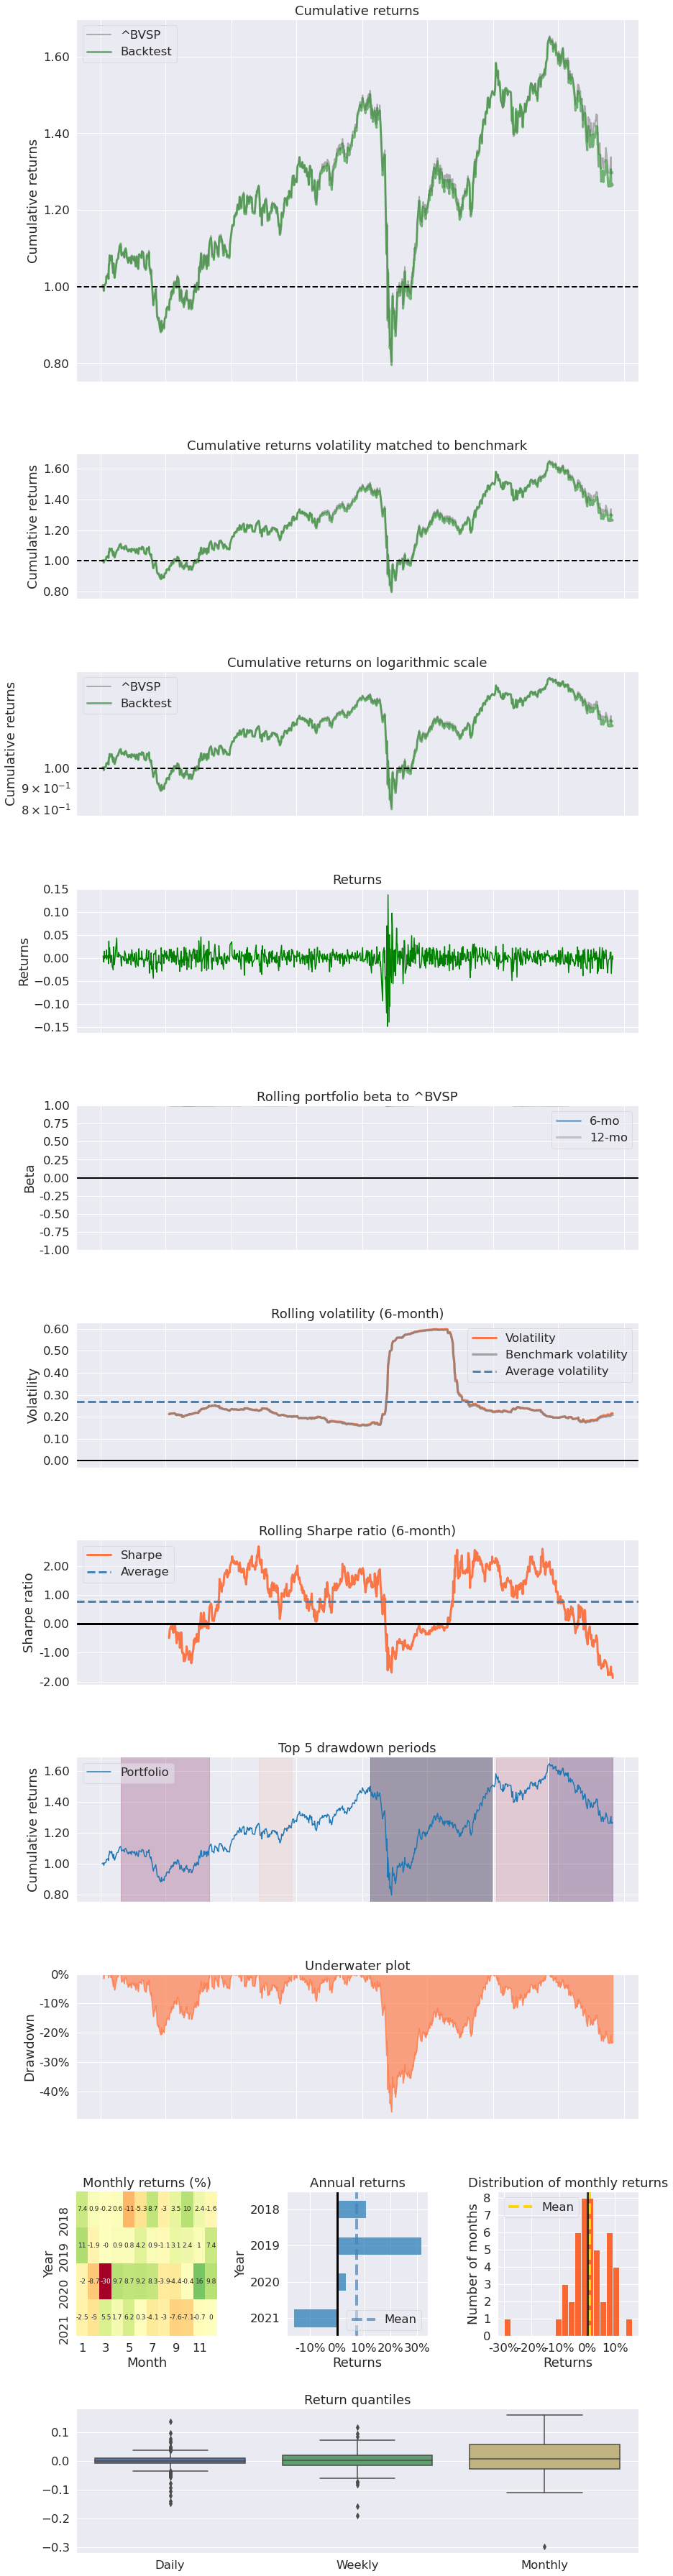

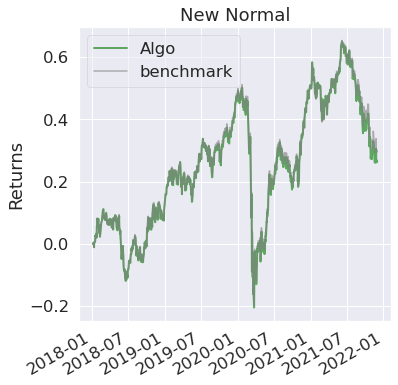

In [27]:
pf.create_full_tear_sheet(carteira['Retorno'], benchmark_rets=retorno['^BVSP'])

INDICE DE SHARP: Para cada 1 ponto de risco que o investidor correu no passado com o fundo X ele obteve um retorno de 0,1 pontos de rentabilidade acima daquela recebida se tivesse optado por um investimento livre de risco.

In [28]:
from fbprophet import Prophet

In [29]:
tickers = {'PETR4.SA', 'CCRO3.SA', 'ITUB4.SA','VALE3.SA','IRBR3.SA','^BVSP'}
dados_yahoo = web.get_data_yahoo(tickers, start='2018-01-05')['Adj Close']

[*********************100%***********************]  6 of 6 completed


In [29]:
X = pd.DataFrame(index=range(0,len(dados_yahoo)))
X['ds'] = dados_yahoo.index
X['y'] = dados_yahoo['^BVSP'].values
X.tail()

,ds,y
948,2021-11-24,104514.0000
949,2021-11-25,105811.0000
950,2021-11-26,102290.0000
951,2021-11-29,102814.0000
952,2021-11-30,102608.8125


In [ ]:
m = Prophet(daily_seasonality=True)
m.fit(X)
future = m.make_future_dataframe(periods=5)
future.tail()

KeyError: 'metric_file'

Exception ignored in: 'stanfit4anon_model_dfdaf2b8ece8a02eb11f050ec701c0ec_8375972266679054566._set_stanargs_from_dict'
Traceback (most recent call last):
  File "/home/felipe/anaconda3/lib/python3.8/site-packages/pystan/model.py", line 550, in optimizing
    ret, sample = fit._call_sampler(stan_args)
KeyError: 'metric_file'


In [44]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
775,2021-03-04,114847.787000,109930.110890,119817.457102
776,2021-03-05,114248.140918,109621.068595,119199.004961
777,2021-03-06,118285.690967,113131.041820,122950.669026
778,2021-03-07,117756.484433,112765.713261,122928.311594
779,2021-03-08,112676.270816,107764.915967,117614.887775


In [45]:
from fbprophet.plot import plot_plotly
from fbprophet import Prophet
import fbprophet.plot as fp
import plotly.io as pio
pio.renderers.default = 'notebook_connected'


In [46]:
fig = fp.plot_plotly(m, forecast)  # This returns a plotly Figure
fig.show()

In [47]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
775,2021-03-04,114847.787000,109930.110890,119817.457102
776,2021-03-05,114248.140918,109621.068595,119199.004961
777,2021-03-06,118285.690967,113131.041820,122950.669026
778,2021-03-07,117756.484433,112765.713261,122928.311594
779,2021-03-08,112676.270816,107764.915967,117614.887775


In [40]:
dados_yahoo

,CCRO3.SA,IRBR3.SA,ITUB4.SA,PETR4.SA,VALE3.SA,^BVSP
Date,,,,,,
2018-01-05,14.547094,9.964203,26.103096,15.613233,38.005573,79071.0000
2018-01-08,14.345174,10.126223,26.016529,15.798772,38.850338,79379.0000
2018-01-09,14.353953,10.111756,25.733744,15.798772,38.706551,78864.0000
2018-01-10,14.002785,10.108864,25.647179,15.585402,38.167339,78201.0000
2018-01-11,14.002785,10.415544,26.183895,16.002867,38.913250,79365.0000
...,...,...,...,...,...,...
2021-02-25,11.480000,6.090000,25.847828,23.190001,95.709999,112256.0000
2021-02-26,11.250000,6.000000,25.534998,22.240000,94.519997,110035.0000
2021-03-01,10.920000,5.830000,24.770000,22.000000,98.570000,110335.0000


In [36]:
from collections import OrderedDict

Um dado cliente exige aplicar:

(a) não mais que 25% do total em um único título

(b) no máximo 50% do total em títulos com alto risco

(c) mais de 50% do total em títulos com vencimento superior a 10 anos.

Para máxima rentabilidade, que percentual do total deve ser aplicado em cada título?

Identificando os elementos do problema
Variáveis de decisão

Percentual do total a ser aplicado em cada título

Função-Objetivo

(X) Max - Rentabilidade (ao ano) de todas as aplicações.

Restrições às variáveis

Exigências quanto a: diversificação, carência, segurança, investir a totalidade

Parâmetros

Caracterização de cada título: riscos, taxas de retorno, vencimentos.

In [37]:
prob = p.LpProblem('Rentabilidade', p.LpMaximize)

In [38]:
#Setando as variáveis de decisão
p1 = p.LpVariable('p1', lowBound=0)
p2 = p.LpVariable('p2', lowBound=0)
p3 = p.LpVariable('p3', lowBound=0)
p4 = p.LpVariable('p4', lowBound=0)
p5 = p.LpVariable('p5', lowBound=0)
p6 = p.LpVariable('p6', lowBound=0)

#Setando as taxas de retorno ao ano dos títulos
i1 = 0.087  #15 anos, Muito Baixo
i2 = 0.095  #12 anos, Regular
i3 = 0.120  #8 anos, Alto
i4 = 0.090  #7 anos, Baixo
i5 = 0.13   #11 anos, Alto
i6 = 0.200  #5 anos, Muito Alto

In [ ]:
#Criando a função objetivo
prob += i1 * (p1*0.01) + i2 * (p2*0.01) + i3 * (p3*0.01) + i4 * (p4*0.01) + i5 * (p5*0.01) + i6 * (p6*0.01)

#Criando as restrições e parâmetros. 
prob += p1 + p2 + p3 + p4 + p5 + p6 ==1
prob += p1 <=0.25
prob += p2 <=0.25
prob += p3 <=0.25
prob += p4 <=0.25
prob += p5 <=0.25
prob += p6 <=0.25
prob += p3 + p5 + p6 <=0.5
prob += p1 + p2 + p5 >=0.5
prob += p1 >=0
prob += p2 >=0
prob += p3 >=0
prob += p4 >=0
prob += p5 >=0
prob += p6 >=0


In [ ]:
#Resolvendo o Problema
status = prob.solve() 
print(p.LpStatus[status])
print(p.value(prob.objective))

#Exibindo a solução final

df = OrderedDict({
    'Título 1' :[p.value(p1)],
    'Título 2' :[p.value(p2)],
    'Título 3' :[p.value(p3)],
    'Título 4' :[p.value(p4)],
    'Título 5' :[p.value(p5)],
    'Título 6' :[p.value(p6)]
})

format_dict = {
    'Título 1': '{:.1%}',
    'Título 2': '{:.1%}',
    'Título 3': '{:.1%}',
    'Título 4': '{:.1%}',
    'Título 5': '{:.1%}',
    'Título 6': '{:.1%}',
}

df = pd.DataFrame(df)
df.style.format(format_dict).hide_index()



Aqui, vamos colocar os títulos com os maiores rendimentos de 2020. E com base neles vamos criar as restrições e parâmetros do nosso modelo. 

In [39]:
prob = p.LpProblem('Rentabilidade', p.LpMaximize)

In [40]:
#Setando as variáveis de decisão
p1 = p.LpVariable('p1', lowBound=0)
p2 = p.LpVariable('p2', lowBound=0)
p3 = p.LpVariable('p3', lowBound=0)

#Setando as taxas de retorno ao ano dos título
i1 = 0.1781 #Retorno da carteira 1
i2 = 0.1741  #Retorno da carteira 2
i3 = 0.3845  #Retorno da carteira 3


In [41]:
#Criando a função objetivo
prob += i1 * (p1*0.33) + i2 * (p2*0.33) + i3 * (p3*0.33) 
#Criando as restrições e parâmetros. 
prob += p1 + p2 + p3 ==1
prob += p1 <=0.9
prob += p2 <=0.9
prob += p3 <=0.9
prob += p1 + p3 <=0.5
prob += p1 + p2 >=0.5
prob += p1 >=0
prob += p2 >=0
prob += p3 >=0


In [42]:
#Resolvendo o Problema
status = prob.solve() 
print(p.LpStatus[status])
print(p.value(prob.objective))

#Exibindo a solução final

df = OrderedDict({
    'Título 1' :[p.value(p1)],
    'Título 2' :[p.value(p2)],
    'Título 3' :[p.value(p3)]  
})

format_dict = {
    'Título 1': '{:.1%}',
    'Título 2': '{:.1%}',
    'Título 3': '{:.1%}'
}

df = pd.DataFrame(df)
df.style.format(format_dict).hide_index()

Optimal
0.092169


Título 1,Título 2,Título 3
0.0%,50.0%,50.0%


In [54]:
#'PETR4.SA', 'CCRO3.SA', 'ITUB4.SA','VALE3.SA','^BVSP'
tickers = {'^BVSP'}
up = web.get_data_yahoo(tickers, start='2014-01-05')


[*********************100%***********************]  1 of 1 completed


In [55]:
up

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-06,50980.000000,51002.000000,50451.000000,50974.00000,50974.00000,3727800
2014-01-07,50982.000000,51478.000000,50429.000000,50430.00000,50430.00000,3339500
2014-01-08,50431.000000,50793.000000,50424.000000,50577.00000,50577.00000,2916500
2014-01-09,50576.000000,50576.000000,49259.000000,49322.00000,49322.00000,3702600
2014-01-10,49322.000000,50145.000000,49267.000000,49696.00000,49696.00000,3509600
...,...,...,...,...,...,...
2021-02-25,115668.000000,116506.000000,111764.000000,112256.00000,112256.00000,12466500
2021-02-26,112260.000000,113466.000000,109827.000000,110035.00000,110035.00000,14618500
2021-03-01,110036.000000,112445.000000,110036.000000,110335.00000,110335.00000,11239900


<AxesSubplot:title={'center':'Ação Analisada'}, xlabel='Date'>

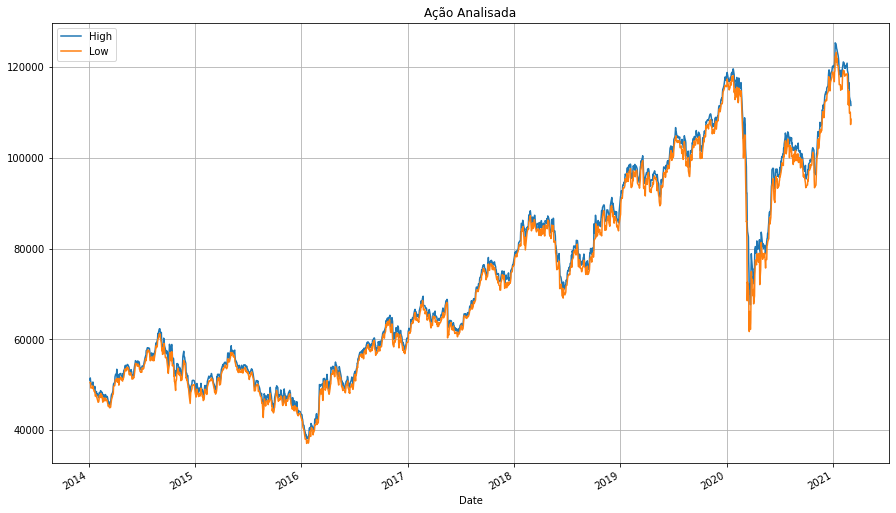

In [56]:
up[['High', 'Low']].plot(figsize=(15, 9), title='Ação Analisada', grid=True)

In [57]:
# Média movel de 20 dias do Fechamento
up['MovingMean20'] = up.Close.rolling(20).mean()
# Média movel de 72 dias do Fechamento
up['MovingMean72'] = up.Close.rolling(72).mean()
# Média movel de 200 dias do Fechamento
up['MovingMean200'] = up.Close.rolling(200).mean()


In [58]:
up

,Open,High,Low,Close,Adj Close,Volume,MovingMean20,MovingMean72,MovingMean200
Date,,,,,,,,,
2014-01-06,50980.000000,51002.000000,50451.000000,50974.00000,50974.00000,3727800,NaN,NaN,NaN
2014-01-07,50982.000000,51478.000000,50429.000000,50430.00000,50430.00000,3339500,NaN,NaN,NaN
2014-01-08,50431.000000,50793.000000,50424.000000,50577.00000,50577.00000,2916500,NaN,NaN,NaN
2014-01-09,50576.000000,50576.000000,49259.000000,49322.00000,49322.00000,3702600,NaN,NaN,NaN
2014-01-10,49322.000000,50145.000000,49267.000000,49696.00000,49696.00000,3509600,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2021-02-25,115668.000000,116506.000000,111764.000000,112256.00000,112256.00000,12466500,117580.500000,115069.222222,103019.115000
2021-02-26,112260.000000,113466.000000,109827.000000,110035.00000,110035.00000,14618500,117259.050000,115197.847222,103171.935000
2021-03-01,110036.000000,112445.000000,110036.000000,110335.00000,110335.00000,11239900,116981.700000,115330.291667,103328.290000


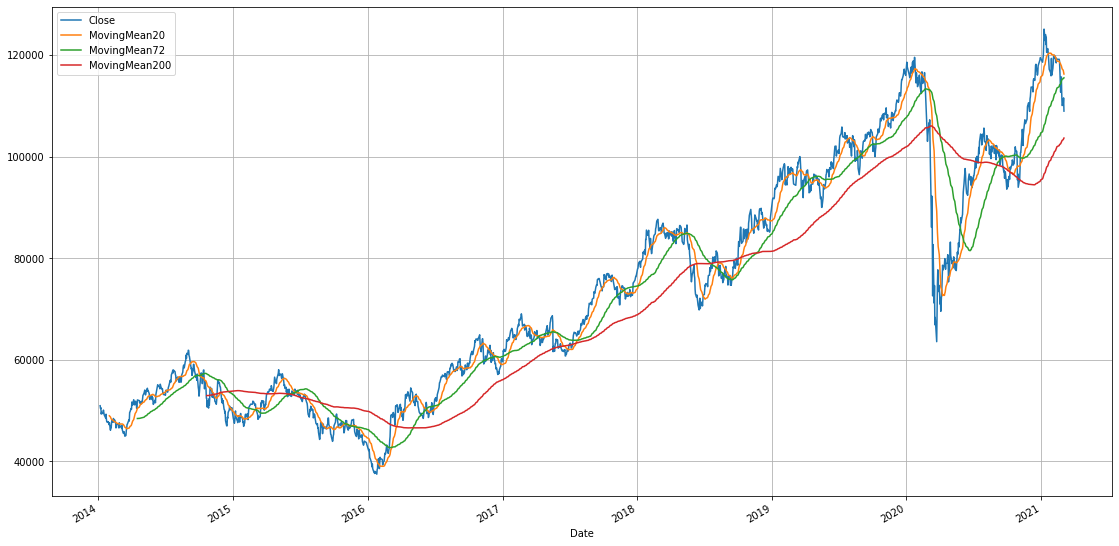

In [59]:
columns = ['Close','MovingMean20', 'MovingMean72', 'MovingMean200']
graph = up[columns].plot(figsize=(19, 10), grid=True)

<AxesSubplot:xlabel='Month', ylabel='Close'>

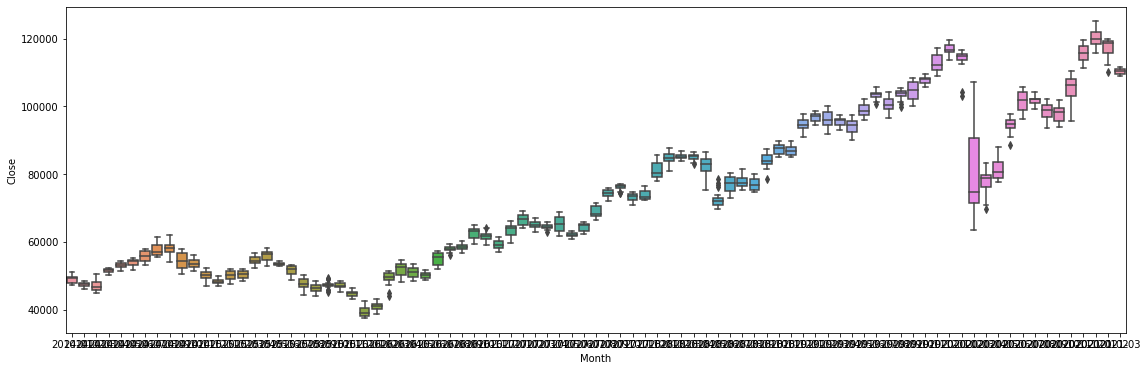

In [60]:
fig, ax1 = plt.subplots(1, 1, figsize=(19, 6))
up['Month'] = up.index.to_period('M')
sns.boxplot('Month', 'Close', data=up, ax=ax1)

In [3]:
# importar as bibliotecas necessárias
import pandas as pd
from pandas_datareader import data as web
import plotly.graph_objects as go

# criar um DataFrame vazio
df = pd.DataFrame()

In [62]:
# escolher a ação desejada
acao = 'ENGI3.SA'

# importar dados para o DataFrame
df = web.DataReader(acao, data_source='yahoo', start='2015-01-01')

# ver as 5 primeiras entradas
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,2.457647,2.457647,2.457647,2.457647,2.015266,0
2015-01-05,2.457647,2.457647,2.457647,2.457647,2.015266,0
2015-01-06,2.457647,2.457647,2.457647,2.457647,2.015266,0
2015-01-07,2.457647,2.457647,2.457647,2.457647,2.015266,0
2015-01-08,2.457647,2.457647,2.457647,2.457647,2.015266,0


In [63]:
# plotar o gráfico de candlestick
trace1 = {
    'x': df.index,
    'open': df.Open,
    'close': df.Close,
    'high': df.High,
    'low': df.Low,
    'type': 'candlestick',
    'name': acao,
    'showlegend': False
}

data = [trace1]
layout = go.Layout()

fig = go.Figure(data=data, layout=layout)
fig.show()

In [64]:
# Calculate and define moving average of 21 periods
avg_21 = df.Close.rolling(window=21, min_periods=1).mean()

# Calculate and define moving average of 72 periods
avg_72 = df.Close.rolling(window=72, min_periods=1).mean()

# Calculate and define moving average of 200 periods
avg_200 = df.Close.rolling(window=200, min_periods=1).mean()

In [65]:
# Second instance - avg_21
trace2 = {
    'x': df.index,
    'y': avg_21,
    'type': 'scatter',
    'mode': 'lines',
    'line': {
        'width': 1,
        'color': 'blue'
            },
    'name': 'AVG 21 periods'
}

# Second instance - avg_72
trace3 = {
    'x': df.index,
    'y': avg_72,
    'type': 'scatter',
    'mode': 'lines',
    'line': {
        'width': 1,
        'color': 'purple'
            },
    'name': 'AVG 72 periods'
}

# Second instance - avg_200
trace4 = {
    'x': df.index,
    'y': avg_200,
    'type': 'scatter',
    'mode': 'lines',
    'line': {
        'width': 1,
        'color': 'red'
            },
    'name': 'AVG 200 periods'
}

In [66]:
# Aggregate all instances and define 'data' variable
data = [trace1, trace2, trace3, trace4]
# Config graph layout
layout = go.Layout({
    'title': {
        'text': 'ENGI3.SA - ENERGISA',
        'font': {
            'size': 14
        }
    }
})

In [67]:
# Create Figure and plot
fig = go.Figure(data=data, layout=layout)
fig.write_html("./ENGI3.SA-web.html")
fig.show()

In [2]:
from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices


In [4]:
# escolher a ação desejada
#'ENGI3.SA', 'CCRO3.SA', 'ITUB4.SA','VALE3.SA', 'CPLE3.SA', 'KLBN4.SA', 'GGBR4.SA', 'GOL'
acao = ['ETH-USD', 'ADA-USD', 'XRP-USD']

# importar dados para o DataFrame
df1 = web.DataReader(acao, data_source='yahoo', start='2019-01-01')['Close']

# ver as 5 primeiras entradas
df1.tail()

Symbols,ETH-USD,ADA-USD,XRP-USD
Date,,,
2021-02-27,1459.973145,1.324860,0.437809
2021-02-28,1416.048950,1.308059,0.414953
2021-03-01,1564.707642,1.292388,0.447244
2021-03-02,1492.608765,1.225582,0.436837
2021-03-03,1625.088623,1.242713,0.450760


In [5]:
# Calculate expected returns and sample covariance
mu = expected_returns.mean_historical_return(df1)
S = risk_models.sample_cov(df1)


In [6]:
print(mu)
print('\n')
print(S)

Symbols
ETH-USD    1.186216
ADA-USD    1.942138
XRP-USD    0.070033
dtype: float64


Symbols   ETH-USD   ADA-USD   XRP-USD
Symbols                              
ETH-USD  0.582974  0.526024  0.409062
ADA-USD  0.526024  0.836476  0.439040
XRP-USD  0.409062  0.439040  0.804789


In [7]:

# Optimize for maximal Sharpe ratio
ef = EfficientFrontier(mu, S)
raw_weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
ef.save_weights_to_file("weights.csv")  # saves to file
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('ETH-USD', 0.0), ('ADA-USD', 1.0), ('XRP-USD', 0.0)])
Expected annual return: 194.2%
Annual volatility: 91.5%
Sharpe Ratio: 2.10


(1.942137857954828, 0.9145908831035204, 2.1016368011808244)

In [ ]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df1)

da = DiscreteAllocation(raw_weights, latest_prices, total_portfolio_value=2000)
allocation, leftover = da.lp_portfolio()
print("Discrete allocation:", allocation)
print("Funds remaining: ${:.2f}".format(leftover))